# Plot overall tweet frequency
This has been converted to a script.

Calculate the entire dataset's overall tweet frequency over time (time bins grouped by day) and save the output in `src/dataout/general/Total_tweet_frequency.jpeg`

In [11]:
# Uncomment below if getting importing issues
# !pip3 install pandas
# !pip3 install matplotlib

In [5]:
import os # creating directories
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# load tweet corpus data
df = pd.read_csv("../datain/topic_modelling/cleaned_tweets_largest_community2.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,created_at,id,cleaned_tweet
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...
...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...


In [7]:
# remove any null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]

# split created_at into date and time columns
#https://intellipaat.com/community/13909/python-how-can-i-split-a-column-with-both-date-and-time-e-g-2019-07-02-00-12-32-utc-into-two-separate-columns
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
df['time'] = df['created_at'].dt.time

df

,created_at,id,cleaned_tweet,date,time
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,2021-05-31,23:59:42
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,2021-05-31,23:59:40
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,2021-05-31,23:59:35
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,2021-05-31,23:58:47
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,2021-05-31,23:58:44
...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,2021-02-01,11:31:45
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,2021-02-01,11:05:55
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project,2021-02-01,10:49:53
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...,2021-02-01,09:29:19


In [8]:
# group tweets by date and count number of entries per day
dates = df.groupby('date').count()
dates

,created_at,id,cleaned_tweet,time
date,,,,
2021-02-01,8,8,8,8
2021-02-02,9,9,9,9
2021-02-03,13,13,13,13
2021-02-04,3,3,3,3
2021-02-05,7,7,7,7
...,...,...,...,...
2021-05-27,6417,6417,6404,6417
2021-05-28,9037,9037,9028,9037
2021-05-29,7751,7751,7737,7751


# Plot

In [15]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(dates.index, 'cleaned_tweet', data=dates)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_half_year)
plt.title('Tweet Frequency over time: 1 Feb - 31 May')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
# save graph
plt.savefig('../dataout/general/Total_tweet_frequency.jpeg')
plt.close()

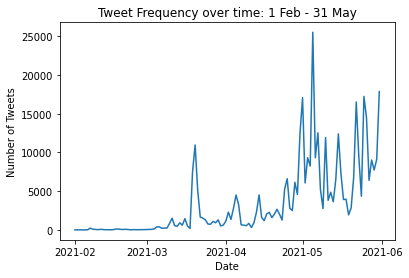

In [16]:
# display graph
fig